# Part 1

### Reading the counties data

In [100]:
import geopandas as gpd
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [233]:
county_boundaries = gpd.read_file('US_County_Boundaries.shp')

In [234]:
county_boundaries.head()

,STFIPS,CTFIPS,STATE,COUNTY,VERSION,Shape_Leng,Shape_Area,geometry
0,02,02016,Alaska,Aleutians West,05,62.576763,1.540013,"MULTIPOLYGON (((-170.34620 57.21312, -170.3328..."
1,02,02290,Alaska,Yukon-Koyukuk,05,63.135667,74.225260,"POLYGON ((-147.99746 64.34170, -148.04161 64.3..."
2,02,02185,Alaska,North Slope,05,130.327563,52.678634,"MULTIPOLYGON (((-149.74913 70.49325, -149.7479..."
3,02,02188,Alaska,Northwest Arctic,05,88.348799,19.328173,"MULTIPOLYGON (((-162.52343 66.04237, -162.5296..."
4,02,02240,Alaska,Southeast Fairbanks,05,21.362151,11.848211,"POLYGON ((-146.48418 63.17392, -146.48920 63.2..."


In [235]:
county_boundaries.shape

(3219, 8)

In [236]:
county_boundaries.crs

{'init': 'epsg:4326'}

In [237]:
county_boundaries=county_boundaries.to_crs(epsg='2778')

In [238]:
county_boundaries.head()

,STFIPS,CTFIPS,STATE,COUNTY,VERSION,Shape_Leng,Shape_Area,geometry
0,02,02016,Alaska,Aleutians West,05,62.576763,1.540013,"MULTIPOLYGON (((-3530500.531 7116467.480, -353..."
1,02,02290,Alaska,Yukon-Koyukuk,05,63.135667,74.225260,"POLYGON ((-2471638.621 6072895.352, -2472618.0..."
2,02,02185,Alaska,North Slope,05,130.327563,52.678634,"MULTIPOLYGON (((-1843434.542 6455429.829, -184..."
3,02,02188,Alaska,Northwest Arctic,05,88.348799,19.328173,"MULTIPOLYGON (((-2501031.816 6829002.437, -250..."
4,02,02240,Alaska,Southeast Fairbanks,05,21.362151,11.848211,"POLYGON ((-2560567.879 5935652.254, -2550685.2..."


### Reading the Rails Data

In [16]:
rails = gpd.read_file('Railroads.shp')
rails.head()

,objectid,fraarcid,frfranode,tofranode,stfips,cntyfips,stcntyfips,stateab,country,fraregion,...,stracnet,tracks,carddirect,net,miles,km,timezone,im_rt_type,ds,geometry
0,1,300000,348741,348746,ND,015,38015,ND,United States,Region 8,...,None,1.0,None,Main sub network,0.178100,0.286624,Central,None,None,"LINESTRING (-100.74520 46.80284, -100.74508 46..."
1,2,300001,338567,338686,MT,087,30087,MT,United States,Region 8,...,None,0.0,None,Other track (minor industrial leads),0.887103,1.427657,Mountain,None,None,"LINESTRING (-106.65758 45.86404, -106.65768 45..."
2,3,300002,330112,330117,ID,031,16031,ID,United States,Region 8,...,None,1.0,None,Main sub network,0.220645,0.355094,Mountain,None,None,"LINESTRING (-113.78531 42.54224, -113.78341 42..."
3,4,300003,330113,330116,ID,031,16031,ID,United States,Region 8,...,None,1.0,None,Major Industrial Lead,0.126813,0.204087,Mountain,None,None,"LINESTRING (-113.78483 42.54230, -113.78481 42..."
4,5,300004,329497,329504,ID,063,16063,ID,United States,Region 8,...,STRACNET designated line,2.0,None,Main sub network,0.445997,0.717764,Mountain,Double Stack,UP-DS,"LINESTRING (-114.40774 42.93609, -114.40761 42..."


In [17]:
rails=rails[(rails['stateab']=='FL') | (rails['stateab']=='NY') | (rails['stateab']=='CA') | (rails['stateab']=='GA') | (rails['stateab']=='TX')]

In [18]:
rails.stateab.value_counts()

CA    17082
TX    16420
NY     5625
GA     5131
FL     4590
Name: stateab, dtype: int64

In [19]:
rails.crs

{'init': 'epsg:4326'}

In [20]:
rails=rails.to_crs(epsg='2778')

### Reading the Roads data

In [23]:
us_roads= gpd.read_file('ne_10m_roads_north_america.shp')

In [24]:
us_roads= us_roads[us_roads['country'] == 'United States']

In [26]:
us_roads.shape

(36845, 14)

In [27]:
us_roads.crs

{'init': 'epsg:4326'}

In [28]:
us_roads= us_roads.to_crs(epsg='2778')

In [29]:
us_roads.head()

,prefix,number,class,type,divided,country,state,note,scalerank,uident,length,rank,continent,geometry
0,None,None,Other,Unpaved,None,United States,California,None,12,0,10.373500,0,North America,"LINESTRING (-3158362.896 2236664.419, -3158362..."
1,None,None,Other,Other Paved,None,United States,Nevada,None,12,1,2.307760,0,North America,"LINESTRING (-3099062.880 2389035.321, -3097202..."
3,None,S1,Other,Other Paved,None,United States,California,None,11,3,46.124100,0,North America,"LINESTRING (-3103880.322 1548371.681, -3103583..."
4,None,S1,Other,Secondary,Undivided,United States,California,None,10,4,0.305463,0,North America,"LINESTRING (-3107494.327 1522807.481, -3107589..."
5,None,None,Other,Secondary,Undivided,United States,California,None,11,5,12.558500,0,North America,"LINESTRING (-3114249.103 1530759.320, -3113880..."


In [44]:
us_roads=us_roads[(us_roads['state']=='Florida') | (us_roads['state']=='New York') | (us_roads['state']=='California') | (us_roads['state']=='Georgia') | (us_roads['state']=='Texas')]

In [46]:
us_roads.state.value_counts()

California    2882
New York      2535
Texas         2337
Georgia       1440
Florida       1160
Name: state, dtype: int64

### Cleaning the data and Removing Duplicates

In [239]:
a= county_boundaries.groupby('COUNTY')['COUNTY'].count()
a.head(7)

COUNTY
Abbeville     1
Acadia        1
Accomack      1
Ada           1
Adair         4
Adams        12
Addison       1
Name: COUNTY, dtype: int64

In [240]:
county_boundaries[county_boundaries['COUNTY']=='Adams'].head()

,STFIPS,CTFIPS,STATE,COUNTY,VERSION,Shape_Leng,Shape_Area,geometry
145,53,53001,Washington,Adams,05,3.873732,0.590907,"POLYGON ((-2569780.005 3247413.914, -2569326.3..."
193,16,16003,Idaho,Adams,05,3.356309,0.404177,"POLYGON ((-2510152.416 2839309.006, -2510209.4..."
370,38,38001,North Dakota,Adams,05,2.668324,0.297958,"POLYGON ((-1349023.174 2595835.994, -1349155.4..."
488,55,55001,Wisconsin,Adams,05,2.140236,0.199994,"POLYGON ((-413260.520 2169932.556, -414546.473..."
729,19,19003,Iowa,Adams,05,1.430835,0.117971,"POLYGON ((-851927.829 1912684.276, -852636.805..."


In [241]:
county_boundaries['State_County']= county_boundaries['STATE'] + "-"+  county_boundaries['COUNTY'] 


In [242]:
county_boundaries[county_boundaries['COUNTY']=='Adams'].head()

,STFIPS,CTFIPS,STATE,COUNTY,VERSION,Shape_Leng,Shape_Area,geometry,State_County
145,53,53001,Washington,Adams,05,3.873732,0.590907,"POLYGON ((-2569780.005 3247413.914, -2569326.3...",Washington-Adams
193,16,16003,Idaho,Adams,05,3.356309,0.404177,"POLYGON ((-2510152.416 2839309.006, -2510209.4...",Idaho-Adams
370,38,38001,North Dakota,Adams,05,2.668324,0.297958,"POLYGON ((-1349023.174 2595835.994, -1349155.4...",North Dakota-Adams
488,55,55001,Wisconsin,Adams,05,2.140236,0.199994,"POLYGON ((-413260.520 2169932.556, -414546.473...",Wisconsin-Adams
729,19,19003,Iowa,Adams,05,1.430835,0.117971,"POLYGON ((-851927.829 1912684.276, -852636.805...",Iowa-Adams


In [243]:
county_boundaries['State_County'].nunique()

3212

In [244]:
a= county_boundaries.groupby('State_County')['State_County'].count()
a[a>1]

State_County
Maryland-Baltimore    2
Missouri-St. Louis    2
Virginia-Bedford      2
Virginia-Fairfax      2
Virginia-Franklin     2
Virginia-Richmond     2
Virginia-Roanoke      2
Name: State_County, dtype: int64

In [245]:
county_boundaries[county_boundaries['State_County']=='Maryland-Baltimore']

,STFIPS,CTFIPS,STATE,COUNTY,VERSION,Shape_Leng,Shape_Area,geometry,State_County
2695,24,24005,Maryland,Baltimore,05,5.320920,0.164666,"MULTIPOLYGON (((641224.256 1677589.095, 641395...",Maryland-Baltimore
2696,24,24510,Maryland,Baltimore,05,1.630587,0.021923,"MULTIPOLYGON (((664755.897 1666372.440, 664461...",Maryland-Baltimore


In [246]:
county_boundaries.drop_duplicates(subset='State_County', keep='first', inplace=True)

In [247]:
county_boundaries[county_boundaries['State_County']=='Maryland-Baltimore']

,STFIPS,CTFIPS,STATE,COUNTY,VERSION,Shape_Leng,Shape_Area,geometry,State_County
2695,24,24005,Maryland,Baltimore,05,5.32092,0.164666,"MULTIPOLYGON (((641224.256 1677589.095, 641395...",Maryland-Baltimore


In [248]:
county_boundaries['State_County'].nunique()

3212

In [249]:
county_boundaries.shape

(3212, 9)

In [250]:
county_boundaries=county_boundaries[(county_boundaries['STATE']=='Florida') | (county_boundaries['STATE']=='New York') | (county_boundaries['STATE']=='California') | (county_boundaries['STATE']=='Georgia') | (county_boundaries['STATE']=='Texas')]

### County boundaries plot for 5 states

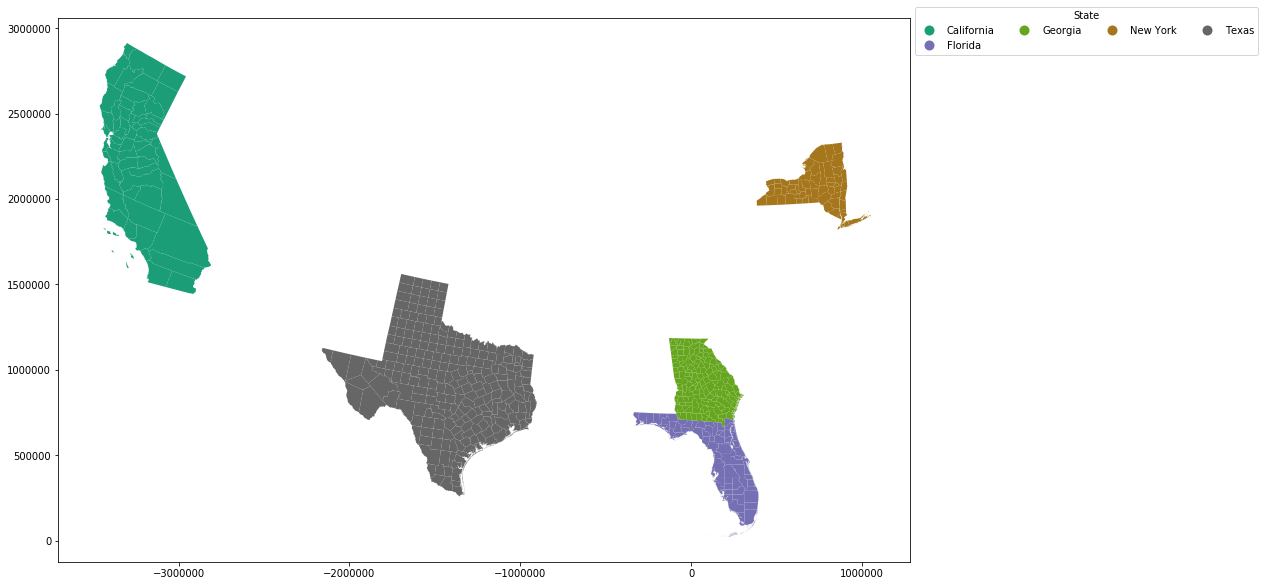

In [251]:
leg_kwds={'title':'State','loc':'upper left','bbox_to_anchor':(1,1.03),'ncol':4}
county_boundaries.plot(column='STATE',cmap='Dark2',legend=True,legend_kwds=leg_kwds,figsize=(18,10))

In [62]:
county_boundaries.STATE.value_counts()

Texas         254
Georgia       159
Florida        67
New York       62
California     58
Name: STATE, dtype: int64

### Creating the Roads & Rails data for each state

In [41]:
us_rails_florida=rails[rails.stateab=='FL']
us_roads_florida=us_roads[us_roads.state=='Florida']

us_rails_newyork=rails[rails.stateab=='NY']
us_roads_newyork=us_roads[us_roads.state=='New York']

us_rails_california=rails[rails.stateab=='CA']
us_roads_california=us_roads[us_roads.state=='California']

us_rails_georgia=rails[rails.stateab=='GA']
us_roads_georgia=us_roads[us_roads.state=='Georgia']

us_rails_texas=rails[rails.stateab=='TX']
us_roads_texas=us_roads[us_roads.state=='Texas']

### Plotting road network in USA

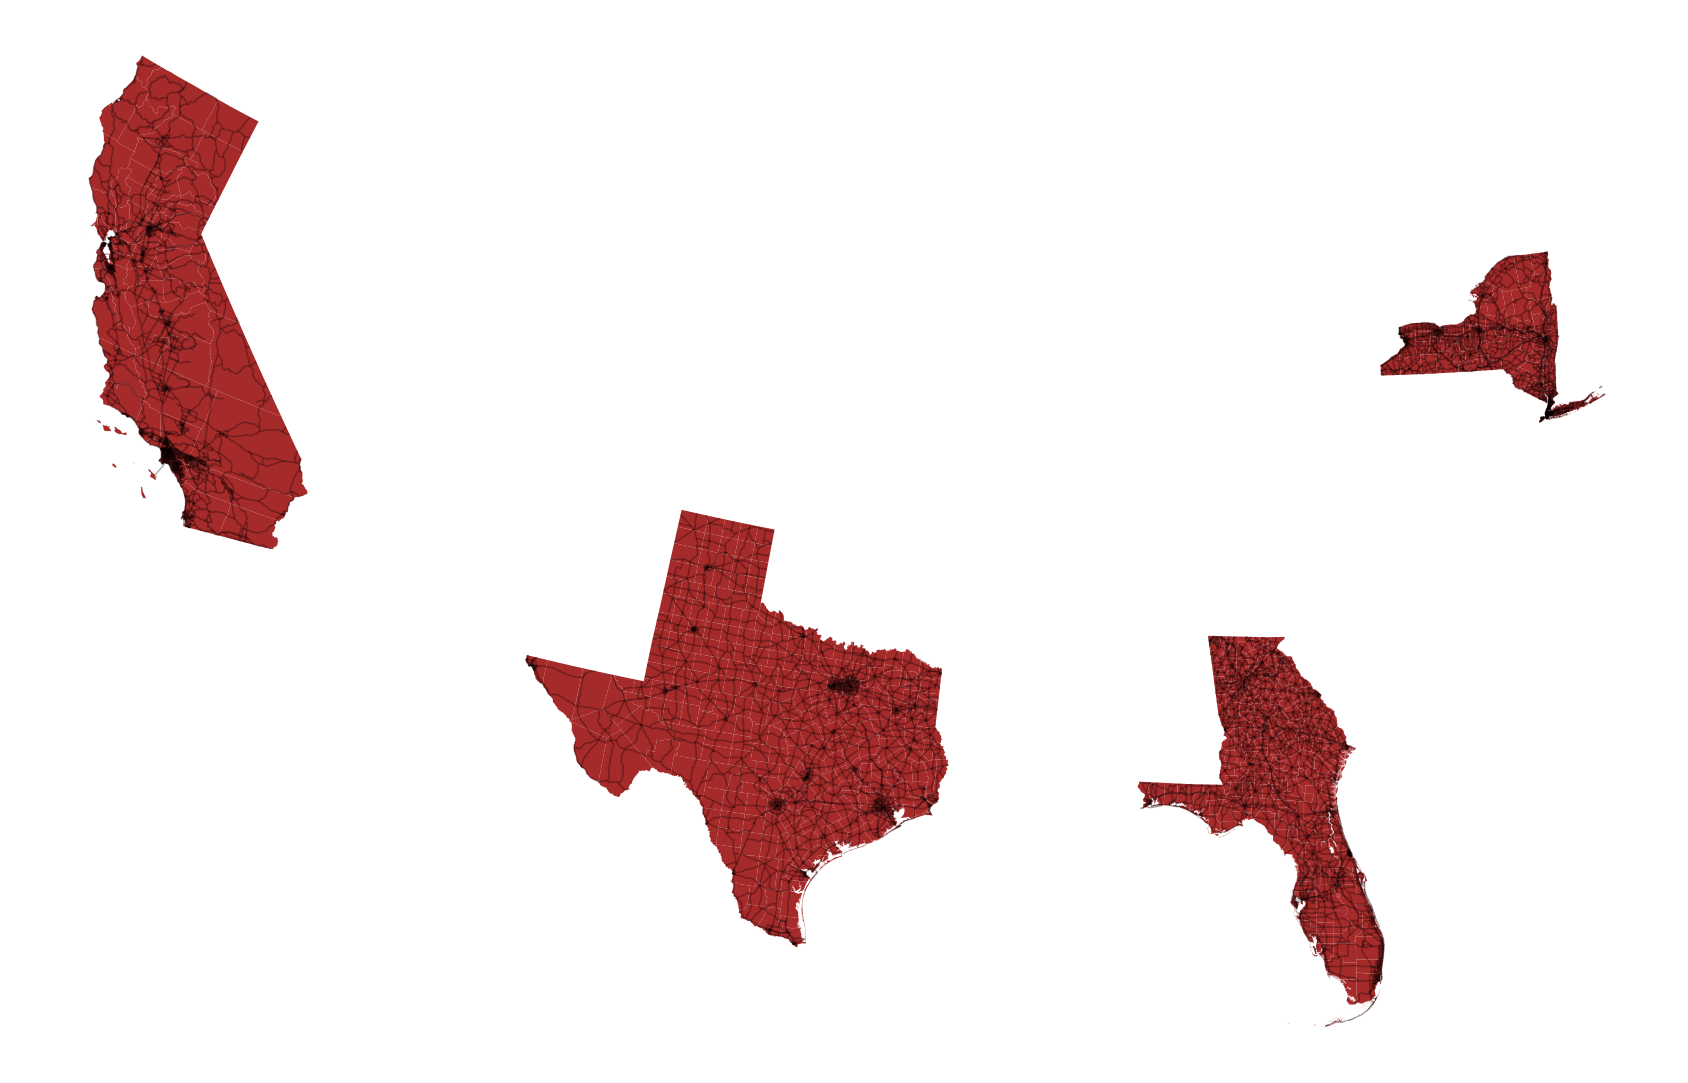

In [252]:
ax = us_roads.plot(color='black',markersize=5,alpha=0.3,figsize=(30,20))
county_boundaries.plot(ax=ax,color='brown',markersize=10)
ax.set_axis_off()

### Plotting Rail network in USA

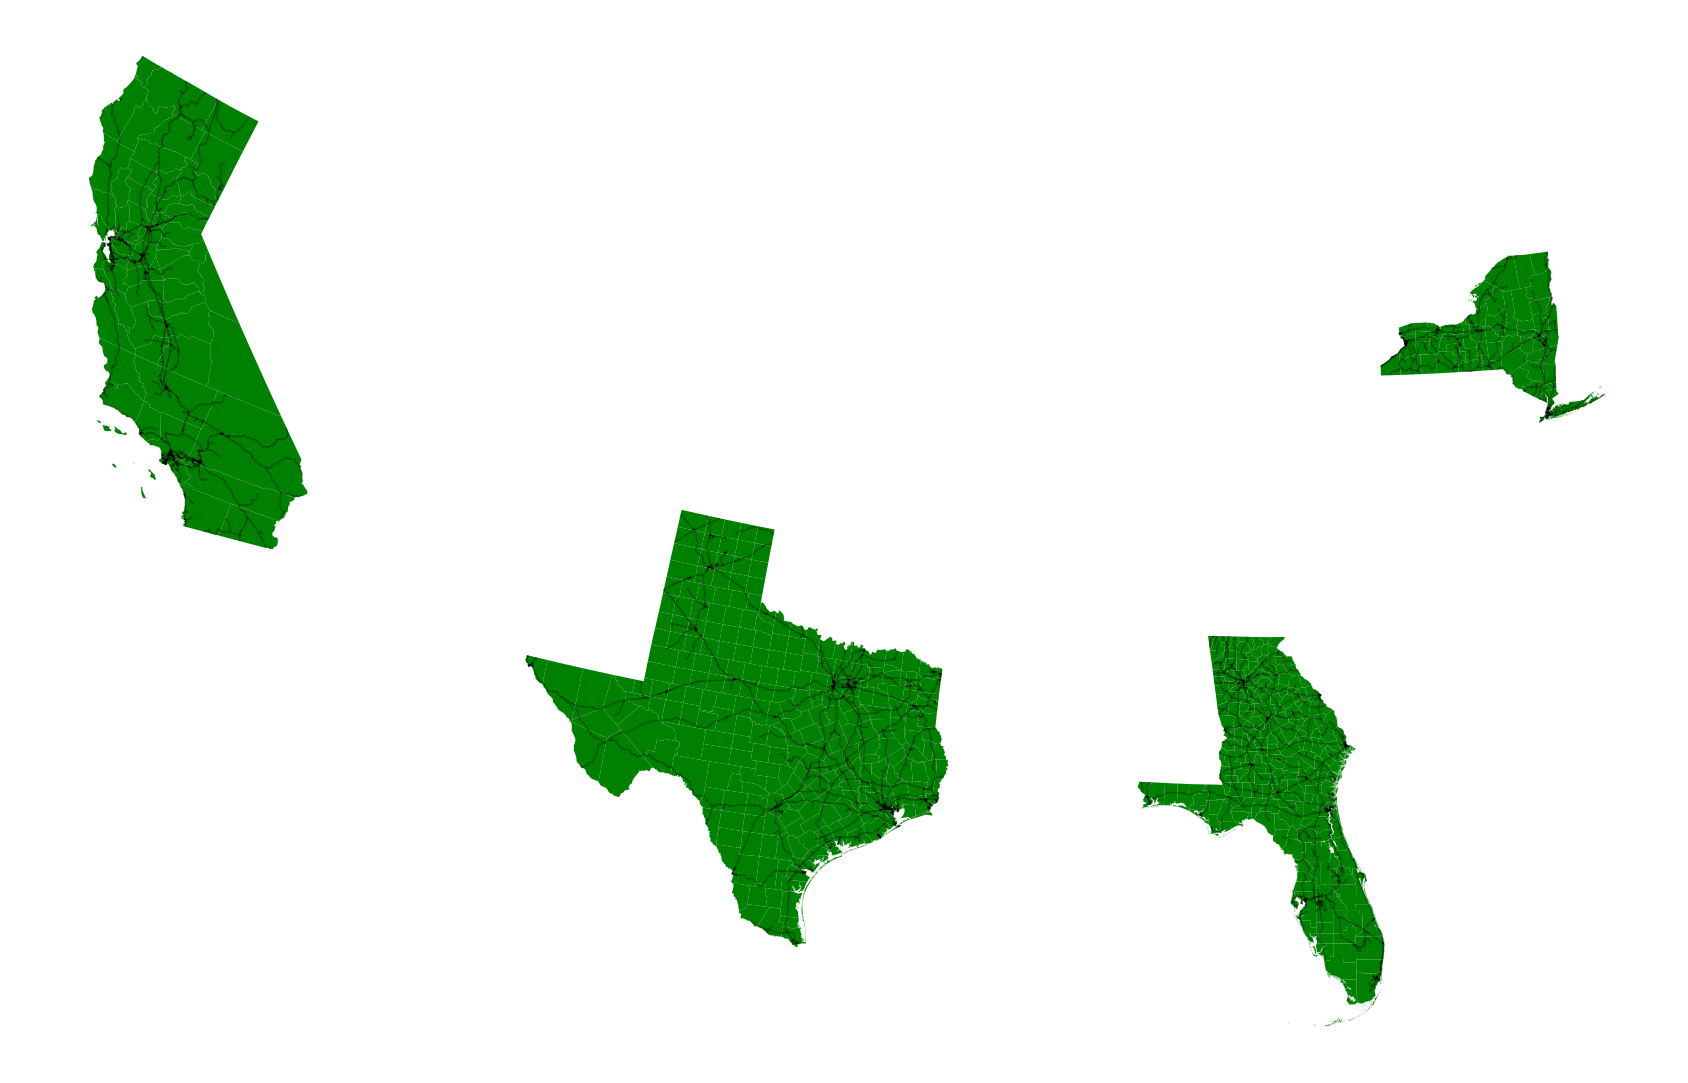

In [253]:
ax = rails.plot(color='black',markersize=5,alpha=0.3,figsize=(30,20))

county_boundaries.plot(ax=ax,color='green',markersize=10)
ax.set_axis_off()

### Creating the county boundaries for each state

### Florida

In [49]:
county_florida= county_boundaries[county_boundaries['STATE']== 'Florida']

### New York


In [50]:
county_newyork= county_boundaries[county_boundaries['STATE']== 'New York']

### California

In [51]:
county_california= county_boundaries[county_boundaries['STATE']== 'California']

### Georgia

In [52]:
county_georgia= county_boundaries[county_boundaries['STATE']== 'Georgia']

### Texas

In [53]:
county_texas= county_boundaries[county_boundaries['STATE']== 'Texas']

### Plotting the roads vs rails on states

Text(0.5, 1, 'Rails(RED) vs Roads(GREEN) for 5 States')

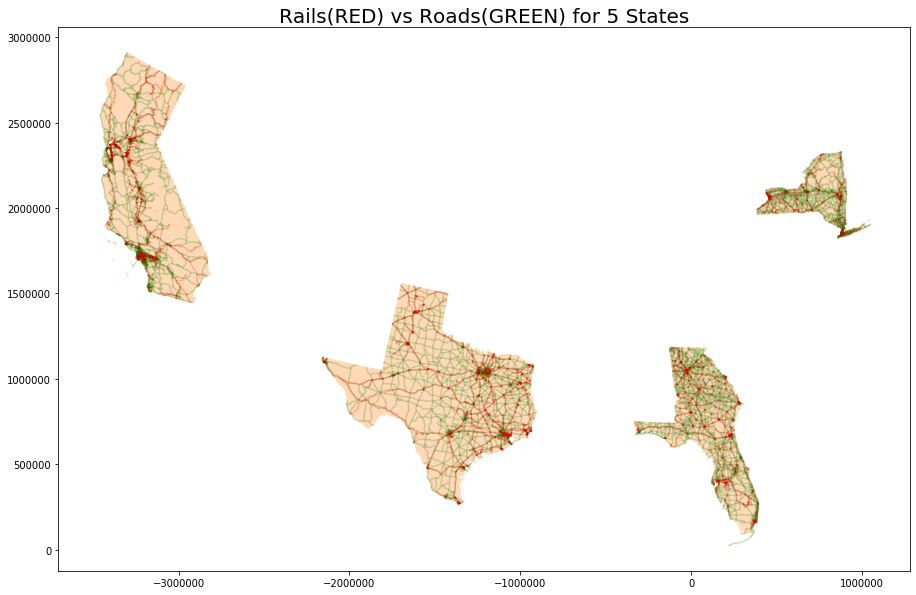

In [72]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(28,10))
us_roads.plot(ax=ax,color='g',markersize=1,alpha=0.2,figsize=(15,10))
rails.plot(ax=ax,color='r',markersize=1,alpha=0.2,figsize=(15,10))
county_boundaries.plot(ax=ax,color='C1',markersize=5,alpha=0.3)
plt.title('Rails(RED) vs Roads(GREEN) for 5 States',fontsize=20)

### Calculating the Area for each state

In [75]:
county_florida['area']=county_florida.geometry.area
county_california['area']=county_california.geometry.area
county_newyork['area']=county_newyork.geometry.area
county_georgia['area']=county_georgia.geometry.area
county_texas['area']=county_texas.geometry.area

### Calculating the Roads Coverage for each state

In [103]:
def cal_roadcoverage(df_county,df_roads):
    road_length =[]
    for n in range(0,df_county.shape[0]):

        road_TPA = 0
        for i,row in df_roads.iterrows():
            lstring = row[13]
            poly = df_county.iloc[n]['geometry']
            

            road_TPA += poly.intersection(lstring).length
        road_length.append(road_TPA)
    df_county['road_length']=road_length    

In [104]:
cal_roadcoverage(county_florida,us_roads_florida)
cal_roadcoverage(county_newyork,us_roads_newyork)
cal_roadcoverage(county_california,us_roads_california)
cal_roadcoverage(county_georgia,us_roads_georgia)
cal_roadcoverage(county_texas,us_roads_texas)

### Calculating the Rails Coverage for each state

In [82]:
def cal_railcoverage(df_county,df_rails):
    rail_length =[]
    for n in range(0,df_county.shape[0]):

        rail_TPA = 0
        for i,row in df_rails.iterrows():
            lstring = row[33]
            poly = df_county.iloc[n]['geometry']
            

            rail_TPA += poly.intersection(lstring).length
        rail_length.append(rail_TPA)
    df_county['rail_length']=rail_length    

In [99]:
cal_railcoverage(county_florida,us_rails_florida)
cal_railcoverage(county_newyork,us_rails_newyork)
cal_railcoverage(county_california,us_rails_california)
cal_railcoverage(county_georgia,us_rails_georgia)
cal_railcoverage(county_texas,us_rails_texas)

### Converting the Area to Miles sq. for each state

In [112]:
county_florida['area']=county_florida['area'].apply(lambda x: x*0.0000003861)
county_california['area']=county_california['area'].apply(lambda x: x*0.0000003861)
county_newyork['area']=county_newyork['area'].apply(lambda x: x*0.0000003861)
county_georgia['area']=county_georgia['area'].apply(lambda x: x*0.0000003861)
county_texas['area']=county_texas['area'].apply(lambda x: x*0.0000003861)

### Converting the Road length to Miles for each state

In [118]:
def cl_miles_road(df):
    df['road_miles']=df['road_length'].apply(lambda x: x*0.621371*0.001)
cl_miles_road(county_florida)
cl_miles_road(county_california)
cl_miles_road(county_newyork)
cl_miles_road(county_georgia)
cl_miles_road(county_texas)

### Converting the Rail length to Miles for each state

In [119]:
def cl_miles_rail(df):
    df['rail_miles']=df['rail_length'].apply(lambda x: x*0.621371*0.001)
cl_miles_rail(county_florida)
cl_miles_rail(county_california)
cl_miles_rail(county_newyork)
cl_miles_rail(county_georgia)
cl_miles_rail(county_texas)

### Statistics for each State

In [125]:

for i in ['county_california','county_newyork','county_georgia','county_texas','county_florida']:
    a={'county_california':county_california,'county_newyork':county_newyork,'county_georgia':county_georgia,\
    'county_texas':county_texas,'county_florida':county_florida}
    print(i)
    print('County Statistics')
    print('Mean ', a[i]['area'].mean(),'Median ',a[i]['area'].median(),'Minimum ',a[i]['area'].min(),'Maximum ',a[i]['area'].max(),'Std Dev',a[i]['area'].std())
    print('Road Statistics')
    print('Mean ', a[i].road_miles.mean(),'Median ',a[i].road_miles.median(),'Minimum ',a[i].road_miles.min(),'Maximum ',a[i].road_miles.max(),'Std Dev',a[i].road_miles.std())
    print('Rail Statistics')
    print('Mean ', a[i].rail_miles.mean(),'Median ',a[i].rail_miles.median(),'Minimum ',a[i].rail_miles.min(),'Maximum ',a[i].rail_miles.max(),'Std Dev',a[i].rail_miles.std())
    
    print('\n')

county_california
County Statistics
Mean  3568.1999115105104 Median  2088.715694513113 Minimum  64.27738607120176 Maximum  25569.54883100154 Std Dev 3983.3915199718567
Road Statistics
Mean  481.0742070932796 Median  321.9132059367554 Minimum  93.65198062320053 Maximum  3275.946217770526 Std Dev 532.248029191903
Rail Statistics
Mean  186.42122048106035 Median  113.83534762048039 Minimum  0.0 Maximum  1267.775910631314 Std Dev 242.25550613491885


county_newyork
County Statistics
Mean  787.6417758922645 Median  665.818531776184 Minimum  23.3544877907785 Maximum  2783.3711199044974 Std Dev 511.64696697054603
Road Statistics
Mean  288.7031957446344 Median  273.47417935572406 Minimum  105.63517289732182 Maximum  692.1975693523942 Std Dev 135.05213129203116
Rail Statistics
Mean  81.23542199031598 Median  68.34768045244546 Minimum  0.0 Maximum  388.022047541189 Std Dev 60.801994616461705


county_georgia
County Statistics
Mean  369.4348074720045 Median  347.38042472473524 Minimum  121.3178499

### Creating the Labels

In [126]:
l1=[]
def label_cal(df):
    for i,j in df[['road_miles','area','rail_miles']].iterrows():
        if (j[0]>df['road_miles'].mean() and j[1]>df['area'].mean() and j[2]>df['rail_miles'].mean()):
            l1.append('Urban')
        else:
            l1.append('Rural')

In [127]:
for i in [county_florida,county_california,county_newyork,county_georgia,county_texas]:
    label_cal(i) 

In [128]:
county_florida['Label']=l1[0:67]
county_california['Label']=l1[67:125]
county_newyork['Label']=l1[125:187]
county_georgia['Label']=l1[187:346]
county_texas['Label']=l1[346:600]

### Creating the Final Dataframe by Concatenating all the States

In [129]:
df=pd.concat([county_florida,county_california,county_newyork,county_georgia,county_texas])

In [130]:
df.shape

(600, 15)

In [132]:
df.Label.value_counts()

Rural    510
Urban     90
Name: Label, dtype: int64

In [141]:
df.reset_index(drop=True,inplace=True)
df.head()

,STFIPS,CTFIPS,STATE,COUNTY,VERSION,Shape_Leng,Shape_Area,geometry,State_County,area,rail_length,road_length,road_miles,rail_miles,Label
0,12,12069,Florida,Lake,05,3.580470,0.275910,"MULTIPOLYGON (((234797.601 547782.736, 234802....",Florida-Lake,1152.967528,46320.745646,471176.778093,292.775586,28.782368,Rural
1,12,12119,Florida,Sumter,05,2.157470,0.138788,"POLYGON ((204465.129 512603.625, 204466.167 51...",Florida-Sumter,580.258242,60632.684746,278131.409255,172.822792,37.675392,Rural
2,12,12117,Florida,Seminole,05,1.542572,0.082489,"POLYGON ((299043.562 474559.245, 298551.540 47...",Florida-Seminole,344.885818,87955.302546,221651.381755,137.727741,54.652874,Rural
3,12,12127,Florida,Volusia,05,11.160615,0.276148,"MULTIPOLYGON (((286643.855 564684.491, 286787....",Florida-Volusia,1150.991668,165329.905573,767974.199637,477.196896,102.731209,Urban
4,12,12095,Florida,Orange,05,2.709400,0.239738,"POLYGON ((309771.238 448895.674, 309788.751 44...",Florida-Orange,1004.212148,196927.570446,650296.954412,404.075669,122.365081,Urban


### Pickle the Processed file 

In [143]:
import pickle
with open('/Users/pankajpatel/Desktop/ProcessedFile.pkl', 'wb') as pkl_file:
    pickle.dump(df, pkl_file)

### Decision Tree Model for classification of type of County (Rural/Urban)

In [144]:
X=df.iloc[:,[9,12,13]]
y=df.iloc[:,-1]
print(X.head())
print('\n')
print(y.head())

          area  road_miles  rail_miles
0  1152.967528  292.775586   28.782368
1   580.258242  172.822792   37.675392
2   344.885818  137.727741   54.652874
3  1150.991668  477.196896  102.731209
4  1004.212148  404.075669  122.365081


0    Rural
1    Rural
2    Rural
3    Urban
4    Urban
Name: Label, dtype: object


In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [146]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [170]:
y_pred=dtree.predict(X_test)

In [171]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [172]:
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.85


In [174]:
print('Precision: ',precision_score(y_test,y_pred,pos_label="Rural"))

Precision:  0.8962264150943396


In [175]:
print('Recall: ',recall_score(y_test,y_pred,pos_label="Rural"))

Recall:  0.9313725490196079


In [176]:
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[95  7]
 [11  7]]


### Hyperparameters Tuning
###### Changing criterion from 'gini impurity' to 'entropy'

In [218]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [219]:
y_pred=dtree.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.8583333333333333


In [227]:
print('Precision: ',precision_score(y_test,y_pred,pos_label="Rural"))

Precision:  0.912621359223301


In [225]:
print('Recall: ',recall_score(y_test,y_pred,pos_label="Rural"))

Recall:  0.9215686274509803


In [226]:
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[94  8]
 [ 9  9]]


### Visualizing the Rules applied by the Decision Tree

In [221]:
from sklearn.tree import export_graphviz

In [222]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [223]:

def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()
    export_graphviz(
        clf, 
        out_file = dot_data,
        filled = True, 
        rounded = True,
        special_characters = True
    )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

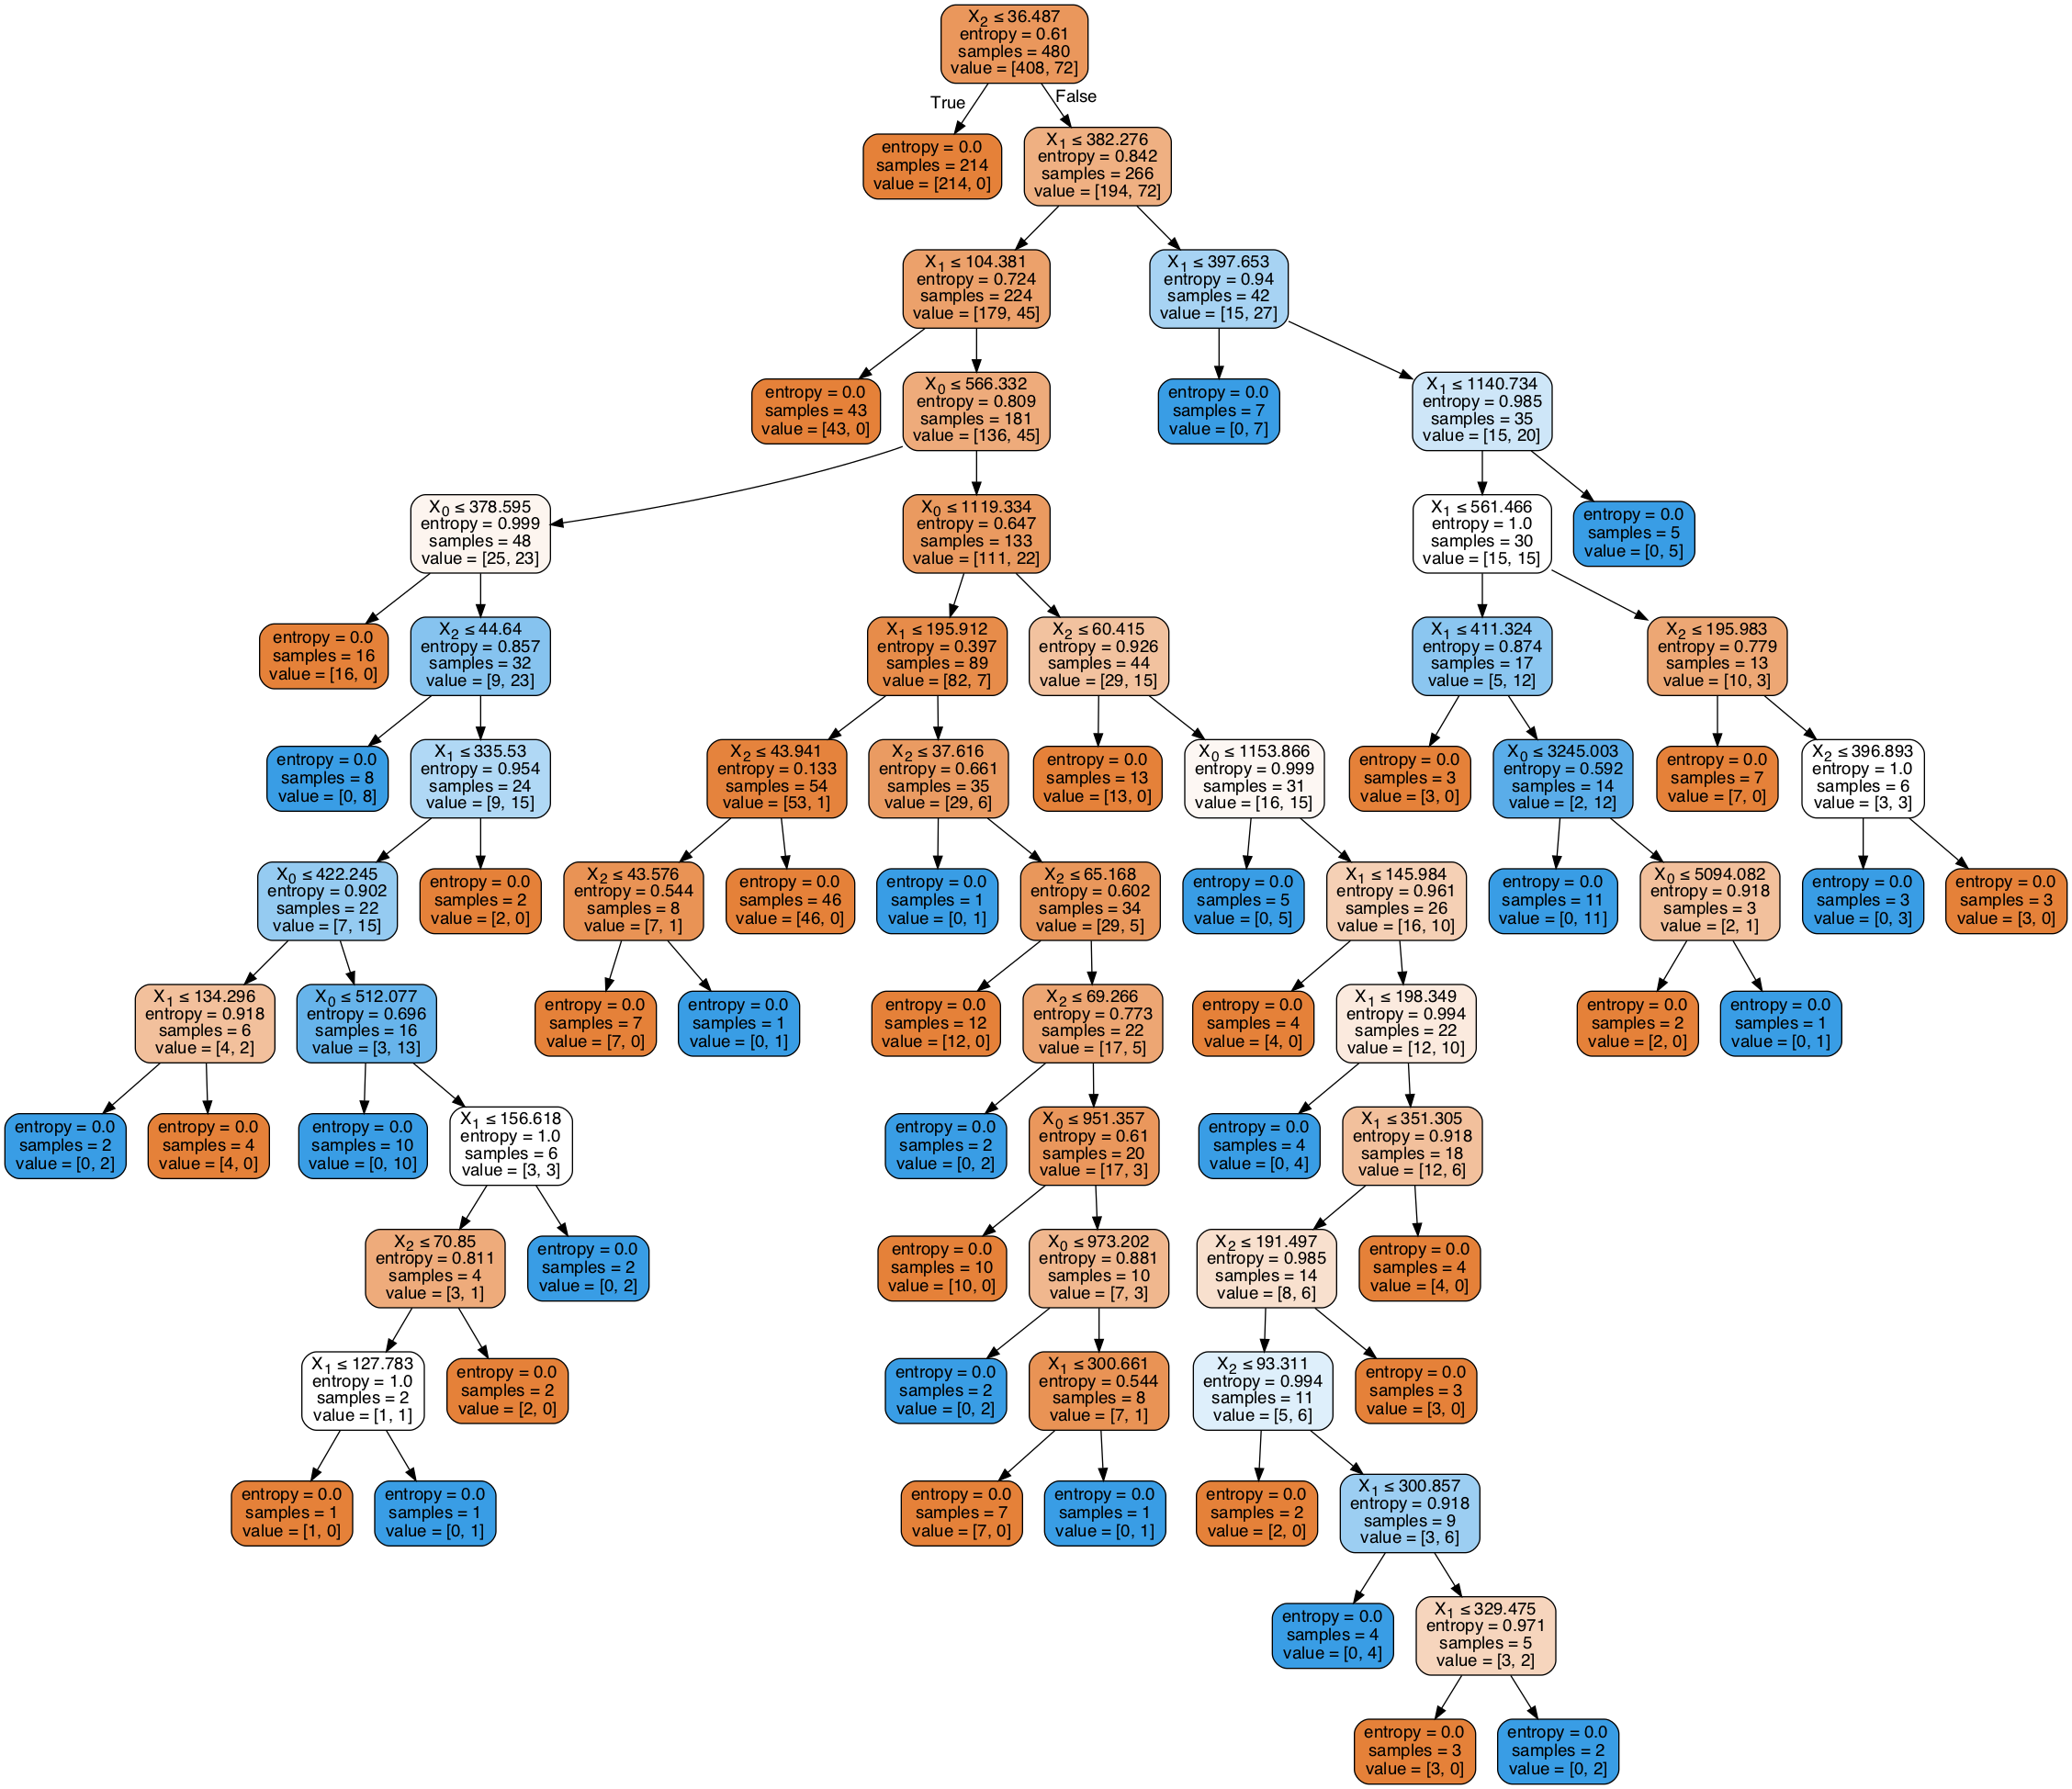

In [224]:
plot_decision_tree(dtree,X_train.columns,y_train)

# Part 2- Based on suggestions from the class

##  Finding Hospitals closest to an incident in Florida

### Establish Connection to GIS

In [1]:
import pandas as pd
from arcgis.gis import GIS

#connect to your GIS
user_name = 'arcgis_python'
password = 'P@ssword123'
my_gis = GIS('https://www.arcgis.com', user_name, password)

### Establish Network

In [2]:
import arcgis.network as network

In [3]:
analysis_url = my_gis.properties.helperServices.closestFacility.url
analysis_url

'https://route.arcgis.com/arcgis/rest/services/World/ClosestFacility/NAServer/ClosestFacility_World'

In [4]:
cf_layer = network.ClosestFacilityLayer(analysis_url, gis=my_gis)

### Create Hospital List

In [5]:
from arcgis import geocoding

In [6]:
# we geocode addresses of hospitals to create the facility layer. 
hospitals_addresses = ['Florida Hospital East Orlando, 7727 Lake Underhill Rd, Orlando, FL 32822',
'Florida Hospital Pepin Heart Institute, 3100 E Fletcher Ave, Tampa, FL 33613',
'HealthSouth Emerald Coast Rehabilitation Hospital, 1847 Florida Ave, Panama City, FL 32405',
"Baptist Children's Hospital, 8900 N Kendall Dr, Miami, FL 33176",
'Halifax Health Medical Center, 303 N Clyde Morris Blvd, Daytona Beach, FL 32114',
'HealthSouth Rehabilitation Hospital of Largo, 901 Clearwater Largo Rd N, Largo, FL 33770',
'HealthSouth Rehabilitation Hospital of Tallahassee, 1675 Riggins Rd, Tallahassee, FL 32308',
'Mayo Clinic Florida, 4500 San Pablo Rd S, Jacksonville, FL 32224',
'Regional Medical Center Bayonet Point, 14000 Fivay Rd, Hudson, FL 34667',
"St. Vincent's Medical Center Riverside, 1 Shircliff Way, Jacksonville, FL 32204"]


In [7]:
len(hospitals_addresses)

10

In [8]:
from arcgis.features import Feature, FeatureSet


In [9]:
hosp_feat_list = []

for address in hospitals_addresses:
    hit = geocoding.geocode(address)[0]
    hosp_feat = Feature(geometry=hit['location'], attributes=hit['attributes'])

    hosp_feat_list.append(hosp_feat)

In [11]:
hospitals_fset = FeatureSet(features=hosp_feat_list, 
                            geometry_type='esriGeometryPoint', 
                            spatial_reference={'latestWkid': 4326})

In [12]:
map1 = my_gis.map('Florida, United States')

In [13]:
map1.draw(hospitals_fset, symbol={"type": "esriSMS","style": "esriSMSSquare",
                                  "color": [76,115,0,255],"size": 8,})

### Create incident list

In [14]:
incident_coords = ' -80.055929,26.713331'
reverse_geocode = geocoding.reverse_geocode({"x": incident_coords.split(',')[0], 
                                              "y": incident_coords.split(',')[1]})

incident_feature = Feature(geometry=reverse_geocode['location'], 
                           attributes=reverse_geocode['address'])

In [15]:
incident_fset = FeatureSet([incident_feature], geometry_type='esriGeometryPoint',
                          spatial_reference={'latestWkid': 4326})

In [16]:
map1.draw(incident_fset, symbol={"type": "esriSMS","style": "esriSMSCircle","color": [255,76,88,255],"size": 8})

### Calculate the shortest route from incident point to the hospital

In [17]:
result = cf_layer.solve_closest_facility(incidents=incident_fset,
                                        facilities=hospitals_fset,
                                        default_target_facility_count=10,
                                        return_facilities=True,
                                        impedance_attribute_name='TravelTime',
                                        accumulate_attribute_names=['Kilometers','TravelTime'])

In [18]:
result.keys()

dict_keys(['messages', 'routes', 'facilities'])

In [19]:
result['routes'].keys()

dict_keys(['fieldAliases', 'geometryType', 'spatialReference', 'features'])

In [20]:
result['routes']['features'][0].keys()

dict_keys(['attributes', 'geometry'])

In [21]:
line_feat_list = []
for line_dict in result['routes']['features']:
    f1 = Feature(line_dict['geometry'], line_dict['attributes'])
    line_feat_list.append(f1)

In [22]:
routes_fset = FeatureSet(line_feat_list, 
                         geometry_type=result['routes']['geometryType'],
                         spatial_reference= result['routes']['spatialReference'])

In [23]:
map1.draw(routes_fset)

### Analyze the results

In [24]:
df1 = routes_fset.sdf
df1.head()

,EndTime,EndTimeUTC,FacilityCurbApproach,FacilityID,FacilityRank,IncidentCurbApproach,IncidentID,Name,ObjectID,SHAPE,...,StartTime,StartTimeUTC,Total_Kilometers,Total_Miles,Total_Minutes,Total_TimeAt1KPH,Total_TravelTime,Total_TruckMinutes,Total_TruckTravelTime,Total_WalkTime
0,None,None,1,4,1,2,1,512 Clematis St - Location 4,1,"{'paths': [[[-80.05589641999995, 26.7134174260...",...,None,None,144.666648,89.891688,None,None,104.985570,None,None,None
1,None,None,1,1,2,2,1,512 Clematis St - Location 1,2,"{'paths': [[[-80.05589641999995, 26.7134174260...",...,None,None,278.732321,173.196235,None,None,157.055498,None,None,None
2,None,None,1,5,3,2,1,512 Clematis St - Location 5,3,"{'paths': [[[-80.05589641999995, 26.7134174260...",...,None,None,316.422383,196.615753,None,None,177.559348,None,None,None
3,None,None,1,2,4,2,1,512 Clematis St - Location 2,4,"{'paths': [[[-80.05589641999995, 26.7134174260...",...,None,None,332.577446,206.654044,None,None,212.679146,None,None,None
4,None,None,2,6,5,2,1,512 Clematis St - Location 6,5,"{'paths': [[[-80.05589641999995, 26.7134174260...",...,None,None,368.134579,228.748222,None,None,242.090317,None,None,None


In [25]:
df1['facility_address'] = hospitals_addresses
df1['incident_address'] = [incident_feature.attributes['Match_addr'] for i in range(len(hospitals_addresses))]

In [26]:
df1[['facility_address','incident_address','Total_Miles','Total_TravelTime']]

,facility_address,incident_address,Total_Miles,Total_TravelTime
0,"Florida Hospital East Orlando, 7727 Lake Under...","512 Clematis St, West Palm Beach, Florida, 33401",89.891688,104.985570
1,"Florida Hospital Pepin Heart Institute, 3100 E...","512 Clematis St, West Palm Beach, Florida, 33401",173.196235,157.055498
2,HealthSouth Emerald Coast Rehabilitation Hospi...,"512 Clematis St, West Palm Beach, Florida, 33401",196.615753,177.559348
3,"Baptist Children's Hospital, 8900 N Kendall Dr...","512 Clematis St, West Palm Beach, Florida, 33401",206.654044,212.679146
4,"Halifax Health Medical Center, 303 N Clyde Mor...","512 Clematis St, West Palm Beach, Florida, 33401",228.748222,242.090317
5,"HealthSouth Rehabilitation Hospital of Largo, ...","512 Clematis St, West Palm Beach, Florida, 33401",240.618503,249.555733
6,HealthSouth Rehabilitation Hospital of Tallaha...,"512 Clematis St, West Palm Beach, Florida, 33401",279.791024,250.711374
7,"Mayo Clinic Florida, 4500 San Pablo Rd S, Jack...","512 Clematis St, West Palm Beach, Florida, 33401",284.631389,257.894418
8,"Regional Medical Center Bayonet Point, 14000 F...","512 Clematis St, West Palm Beach, Florida, 33401",412.995461,368.431393
9,"St. Vincent's Medical Center Riverside, 1 Shir...","512 Clematis St, West Palm Beach, Florida, 33401",533.642397,479.680814


### Visualizing the routes from the incident point (red) to the hospitals (green)

In [27]:
map1

MapView(layout=Layout(height='400px', width='100%'))